https://github.com/Student204161/computational-social-science-assignments

### Contributions:
Each member of the group has participated equally on the project.

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import netwulf as nw
from networkx.algorithms import community
from community import community_louvain
import json
import random

# Part 1: Mixing Patterns and Assortativity

### Exercise 1: Mixing Patterns and Assortativity

In [5]:
import pandas as pd
author_data = pd.read_csv('author_df.csv',dtype=str)
css_df = pd.read_csv('css_df.csv',dtype=str)
css_df.drop(columns=['Unnamed: 0.1'],inplace=True)
css_df['year'] = css_df['year'].astype(float).astype(int)
css_df['citationCount'] = css_df['citationCount'].astype(float).astype(int)

In [6]:
#make dictionary for collab network
import ast
collab_network = {}

for i in range(len(css_df)):
    paper_authorId = ast.literal_eval(css_df.iloc[i]['authorIds'])

    for auth1 in paper_authorId:
        for auth2 in paper_authorId:
            if auth1 != auth2:
                if (auth1,auth2) in collab_network:
                    collab_network[(auth1,auth2)] += 1
                else:
                    collab_network[(auth1,auth2)] = 1

edgelist = [(x[0][0], x[0][1], x[1]) for x in collab_network.items()]

In [7]:
import networkx as nx
import numpy as np
G = nx.Graph()
G.add_weighted_edges_from(edgelist)

In [8]:
#find median citation count of authors in css_df:
css_citation_count = {}
css_first_paper_year = {}
css_author_fullname = {}
css_citation_count_median = {}
css_num_papers = {}
css_author_field = {}

for i in range(len(css_df)):
    paper_authorId = ast.literal_eval(css_df.iloc[i]['authorIds'])
    paper_first_paper_year = css_df.iloc[i]['year']
    for auth in paper_authorId:
        auth = str(auth)
        if auth in css_first_paper_year:
            css_first_paper_year[auth] = min(css_first_paper_year[auth], paper_first_paper_year)
        else:
            css_first_paper_year[auth] = paper_first_paper_year
        if auth in css_citation_count:
            css_citation_count[auth] += [css_df.iloc[i]['citationCount']]
        else:
            css_citation_count[auth] = [css_df.iloc[i]['citationCount']]
#make dictionary with keys as authorId and values as field using css_df pandas dataframe:
for node in G.nodes():
    css_author_field[node] = author_data[author_data["authorId"] == node].iloc[0]["field"]

#add attributes to nodes:
for node in G.nodes():
    node = str(node)
    author_name = [author_data[author_data['authorId'] == node]['name'].values[0]] if not author_data[author_data['authorId'] == node]['name'].empty else []
    author_aliases = author_data[author_data['authorId'] == node]['aliases'].values.tolist()[0] if not author_data[author_data['authorId'] == node]['aliases'].empty else []
    author_aliases = ast.literal_eval(author_aliases) if (not str(author_aliases) == 'nan' and not author_aliases == []) else str(author_aliases)
    author_aliases = [author_aliases] if isinstance(author_aliases,str) else author_aliases
    author_fullname = author_name + author_aliases
    if author_fullname != []:
        author_fullname = max(author_fullname + author_aliases)
        css_author_fullname[node] = author_fullname
    css_citation_count_median[node] = np.median(np.sort(css_citation_count[node]))
    css_num_papers[node] = len(css_citation_count[node])

In [9]:
nx.set_node_attributes(G, name = 'name', values = css_author_fullname)
nx.set_node_attributes(G, name = 'citation_count', values = css_citation_count_median)
nx.set_node_attributes(G, name = 'css_papers', values = css_num_papers)
nx.set_node_attributes(G, name = 'top field', values = css_author_field)
nx.set_node_attributes(G, name = 'first_paper_year', values = css_first_paper_year)

In [10]:
result = []
for node in G.nodes():
    counter_same_field = 0
    field = G.nodes.data()[node]["top field"]
    connected_nodes = [node[1] for node in G.edges(node)]
    for con_node in connected_nodes:
        con_node_field = G.nodes.data()[con_node]["top field"]
        if field == con_node_field:
            counter_same_field += 1
    result.append([node, counter_same_field, len(connected_nodes)])

In [11]:
# Fraction of edges that connect to a node with the same top field:
print("Fraction of edges that connect to a node with the same top field:")
for r in result:
    print(str(r[1]) + "/" + str(r[2]) + "=" + str(r[1]/r[2]))

Fraction of edges that connect to a node with the same top field:
0/5=0.0
2/5=0.4
1/5=0.2
2/5=0.4
1/5=0.2
2/5=0.4
1/5=0.2
2/10=0.2
0/3=0.0
31/90=0.34444444444444444
4/13=0.3076923076923077
16/33=0.48484848484848486
1/8=0.125
2/5=0.4
1/13=0.07692307692307693
2/5=0.4
1/8=0.125
2/6=0.3333333333333333
0/2=0.0
0/13=0.0
0/9=0.0
3/5=0.6
3/5=0.6
1/14=0.07142857142857142
2/3=0.6666666666666666
0/11=0.0
5/6=0.8333333333333334
11/15=0.7333333333333333
8/13=0.6153846153846154
0/15=0.0
11/17=0.6470588235294118
3/15=0.2
0/14=0.0
4/11=0.36363636363636365
8/9=0.8888888888888888
8/9=0.8888888888888888
2/13=0.15384615384615385
8/9=0.8888888888888888
8/9=0.8888888888888888
8/9=0.8888888888888888
13/19=0.6842105263157895
13/18=0.7222222222222222
8/9=0.8888888888888888
1/2=0.5
30/55=0.5454545454545454
0/9=0.0
10/16=0.625
7/20=0.35
9/13=0.6923076923076923
14/26=0.5384615384615384
12/24=0.5
6/8=0.75
6/10=0.6
1/21=0.047619047619047616
7/22=0.3181818181818182
1/11=0.09090909090909091
0/6=0.0
11/15=0.7333333333

In [12]:
# Average value across all nodes:
print("Average value across all nodes:")
print(sum([r[1]/r[2] for r in result]) / len(result))

Average value across all nodes:
0.29956702189773377


### Task 4 & 5 - Assortivity

The formula for the assortivity coefficient is:

$$
r=\frac{\sum_{(i, j) \epsilon E}\left(f(i)-\bar{f}_1\right)\left(f(j)-\bar{f}_2\right)}{\sqrt{\sum_{(i, j) \epsilon E}\left(f(j)-\bar{f}_2\right)^2} \sqrt{\sum_{(i, j) \epsilon E}\left(f(j)-\bar{f}_2\right)^2}}
$$
Using this, we can define our assortativity_degree() function. We note that for undirected graphs, the denominator can be simplified. Since both the terms in the denominator would be the same, we would end up with $\sum_{(i, j) \epsilon E}\left(f(j)-\bar{f}_2\right)^2$
That is why in our function below, we use the simplified term, since we only have undirected edges.

In [ ]:
def assortativity_degree(G):
    degree_dict = dict(G.degree())

    avg_degree = np.mean(list(degree_dict.values()))
    #compute the average degree of each node's neighbors
    avg_degree_neigh_dict = {}
    for node in G.nodes():
        avg_degree_neigh_dict[node] = sum([degree_dict[neigh] for neigh in G.neighbors(node)])/len([degree_dict[neigh] for neigh in G.neighbors(node)])

    #compute the assortativity coefficient
    numerator = 0
    for node in G.nodes():
        numerator += (degree_dict[node] - avg_degree)*(avg_degree_neigh_dict[node] - avg_degree)
    denominator = 0
    for node in G.nodes():
        denominator += (degree_dict[node] - avg_degree)**2
    assortativity_coeff = numerator/denominator
    return assortativity_coeff
import json, pickle
G = pickle.load(open('week4graph.pickle', 'rb'))

assortativity_degree(G)

0.13352579296748282

The assortivity coefficient for the graph is 0.1335 and to asses whether it is assortative we compare quantiles of the simulated graph averages with the number 0.1335. By using the simulated graphs, which we know have random connections, we can see whether our own real graph average could realistically have been sampled under "random" conditions.

# Part 2: Communities


### Exercise 2: Zachary's karate club:

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21]
[9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


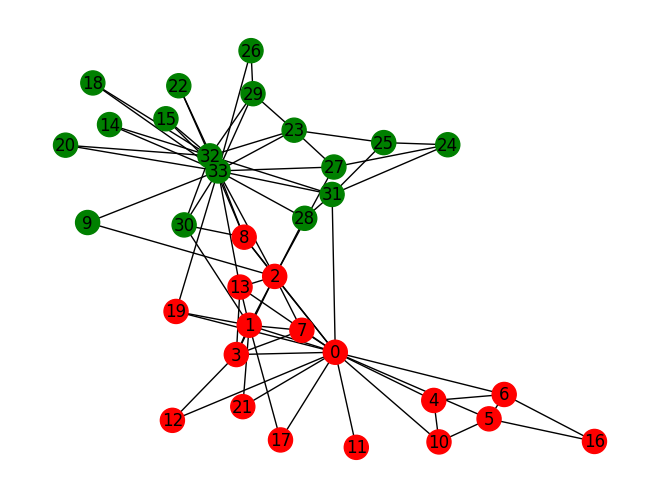

In [2]:
karate_data = nx.karate_club_graph()
club = {node: karate_data.nodes[node]["club"] for node in karate_data.nodes()}
nx.set_node_attributes(karate_data, club, "club")
MrHi = []
Officer = []
for i in range(len(club)):
    if club[i] == "Mr. Hi":
        MrHi.append(i)
    else:
        Officer.append(i)
node_colors = ['red' if club == 'Mr. Hi' else 'green' for club in club]
print(MrHi)
print(Officer)
color = []
for node in karate_data.nodes():
    if club[node] == "Mr. Hi":
        color.append("red")
    else:
        color.append("green")
config = {
    "Node color": node_colors,
    "Node size": 1,
    "Node stroke width": 0,
    "Edge width": 1,
    "Zoom": 0.5,
}
#visualize = nw.visualize(karate_data, config=config) 
# For some reasons does our 
nx.draw(karate_data, with_labels=True, node_color=color)
plt.show()

In [10]:
#Function to compute modularity
def calculate_modularity(karate_data, communities):
    total_edges = karate_data.number_of_edges()
    modularity_score = 0.0
    for community in communities:
        edges_within_community = karate_data.subgraph(community).number_of_edges()
        sum_of_degrees_in_community = sum(karate_data.degree(node) for node in community)
        proportion_of_edges_within_community = edges_within_community / total_edges
        proportion_of_sum_of_degrees = (sum_of_degrees_in_community / (2 * total_edges)) ** 2
        modularity_score += proportion_of_edges_within_community - proportion_of_sum_of_degrees
    return modularity_score

#### Modularity
The modularity of a network is a metric that assesses how effectively it is separated into communities. Modularity is defined as the difference between the actual number of edges within communities and the predicted number of edges if the network were randomly linked while keeping node degrees constant. In other words, modularity assesses how well the network is divided into dense clusters of nodes.

In [11]:
# To calculate the modularity we would need the communities
current_communities = [Officer, MrHi]
modularity_from_current_communities = calculate_modularity(karate_data, current_communities)
print(modularity_from_current_communities)

0.3582347140039447


In [14]:
def double_edge_swap_algorithm(original_graph, num_swaps):
    new_graph = original_graph.copy()
    for i in range(num_swaps):
        u1, v1 = random.choice(list(new_graph.edges()))
        u2, v2 = random.choice(list(new_graph.edges()))
        if (u1 != u2) and (v1 != v2) and (not new_graph.has_edge(u1, v2)) and (not new_graph.has_edge(u2, v1)):
            new_graph.remove_edges_from([(u1, v1), (u2, v2)])
            new_graph.add_edges_from([(u1, v2), (u2, v1)])
    return new_graph

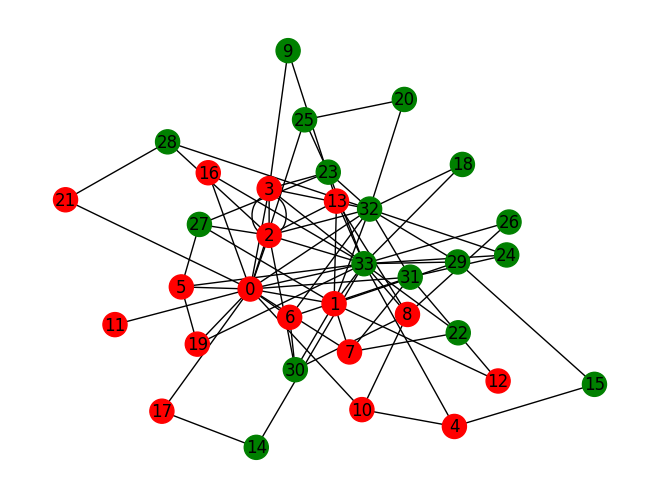

In [16]:
#double edge swap algorithm
new_graph = karate_data.copy()
num_edges = new_graph.number_of_edges()
karate_data_double_edge_swap = double_edge_swap_algorithm(karate_data, num_edges)
nx.draw(karate_data_double_edge_swap, with_labels=True, node_color=color)
plt.show()  

In [17]:
original_degrees = [degree for node, degree in karate_data.degree()]
new_degrees = [degree for node, degree in karate_data_double_edge_swap.degree()]
print("Original:", original_degrees)
print("New     :", new_degrees)
a = calculate_modularity(karate_data_double_edge_swap, current_communities)
print("Molarity of double edge swap:",a)

Original: [16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]
New     : [16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]
Molarity of double edge swap: 0.024901380670611373


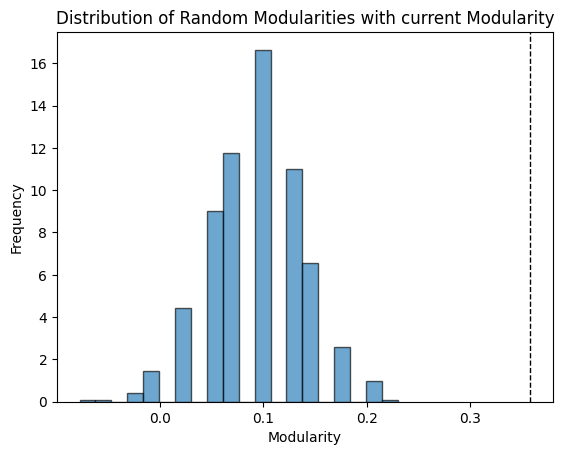

random network mean: 0.09571404012238173
random network std: 0.044969441414557915
random network current_Modularity: [0.050542406311637006, 0.07618343195266267, 0.07618343195266267, 0.024901380670611373, 0.07618343195266267, 0.10182445759368833, 0.10182445759368833, 0.050542406311637006, 0.10182445759368833, 0.10182445759368833, 0.07618343195266267, 0.024901380670611373, 0.07618343195266267, 0.10182445759368833, 0.1531065088757396, 0.10182445759368833, 0.050542406311637006, 0.07618343195266267, 0.17874753451676526, 0.050542406311637006, 0.024901380670611373, 0.050542406311637006, 0.07618343195266267, 0.10182445759368833, 0.12746548323471393, 0.1531065088757396, 0.050542406311637006, 0.1531065088757396, 0.17874753451676526, 0.12746548323471393, 0.10182445759368833, 0.12746548323471393, 0.10182445759368833, 0.050542406311637006, 0.050542406311637006, 0.10182445759368833, 0.12746548323471393, 0.024901380670611373, 0.10182445759368833, 0.10182445759368833, 0.1531065088757396, 0.12746548323

In [18]:
# 1000 randomized version of the Karate Club network of the double edge swap algorithm
num_iterations = 1000
modularities = []
for i in range(num_iterations):
        current_graph = double_edge_swap_algorithm(karate_data, num_edges)
        current_modularity = calculate_modularity(current_graph, current_communities)
        modularities.append(current_modularity)
mean = np.mean(modularities)
std = np.std(modularities)
plt.hist(modularities, bins=20, alpha=0.65, density=True,edgecolor='k')
plt.axvline(x=modularity_from_current_communities, color='k',linestyle='dashed', linewidth=1)
plt.xlabel('Modularity')
plt.ylabel('Frequency')
plt.title('Distribution of Random Modularities with current Modularity')
plt.show()
#Compute the average and standard deviation of the modularity for the random network
print("random network mean:", mean)
print("random network std:", std)
print("random network current_Modularity:",modularities)
if modularity_from_current_communities < mean - 2 * std or modularity_from_current_communities > mean + 2 * std:
    print("Modularity value is significantly different")
else: 
    print("Modularity value is not significantly different")

We can observe that this partitioning becomes a normal distribution. The reason we keep the degree is to show that the structure/pattern stays the same which means that the interactions within the karate club also keeps its form. We learn the effect of the degree and that even through the networks randomized versions it still stays close to the same structure.

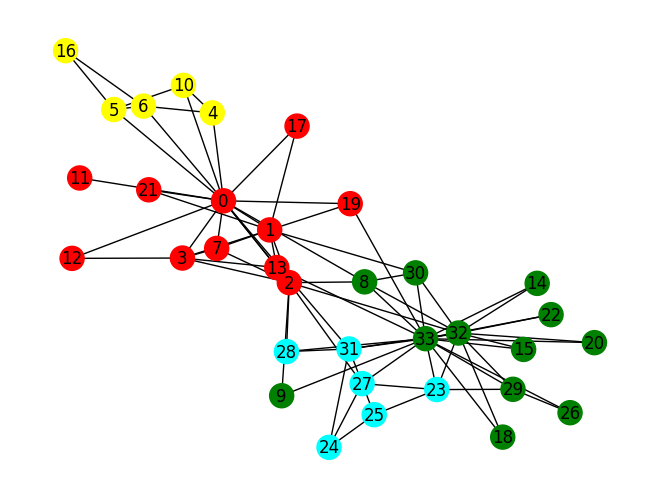

In [6]:
#Louvain-algorithm implementation
partition = community_louvain.best_partition(karate_data)
louvain_colors = ["green", "red", "yellow", "cyan"]
node_color = [louvain_colors[partition[i]] for i in range(len(karate_data.nodes()))]
nx.draw(karate_data, with_labels=True, node_color=node_color)
plt.show()

In [12]:
louvain_molarities = community_louvain.modularity(partition,karate_data)
print("Louvain:",louvain_molarities)
print("current_Modularity:",modularity_from_current_communities)

Louvain: 0.44490358126721763
current_Modularity: 0.3582347140039447


That implies that the Louvain approach discovered a better community structure for the network in issue than the other techniques utilized. It might also imply that the Louvain technique is better suited to evaluating the specific sort of network under consideration.

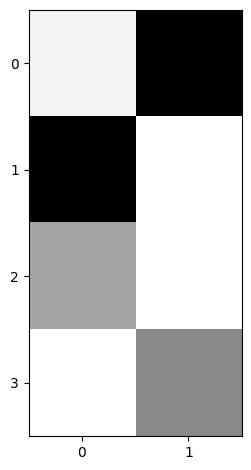

In [23]:
# Confusion Matrix
num_communities = max(partition.values()) + 1
num_groups = len(set(club.values()))
D = [[0 for j in range(num_groups)] for i in range(num_communities)]
for node in karate_data.nodes():
    community_index = partition[node]
    group_index = 0 if club[node] == "Mr. Hi" else 1
    D[community_index][group_index] += 1
fig, ax = plt.subplots()
im = ax.imshow(D, cmap="Greys")
ax.set_xticks(np.arange(num_groups))
ax.set_yticks(np.arange(num_communities))

fig.tight_layout()
plt.show()

The Y-axis represents the communities while the x-axis represents the groups.
The Louvain method separates the two groups quite well, however there are a few misclassifications. With just some misclassified node in community 2, community 0 almost exactly conforms to club 1. While community 1 and group 0 overlap extensively, a few nodes from group 0 are nonetheless allocated to community 2.

### Exercise 3: Community detection on the network of Computational Social Scientists

In [22]:
with open('week4graph.pickle', 'rb') as f:
    G = pickle.load(f)

nx_G = nx.Graph(G)

nx_G.add_nodes_from(G.nodes())
nx_G.add_edges_from(G.edges())

num_communities:126 


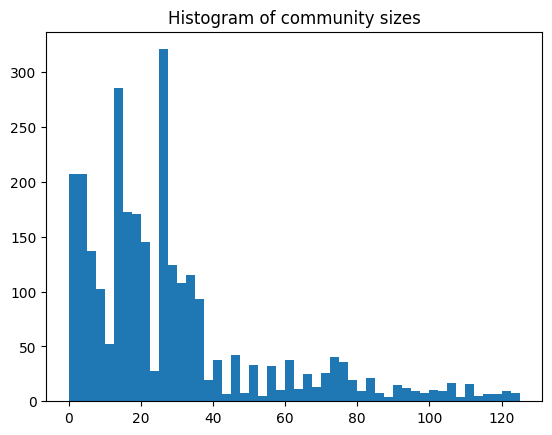

In [24]:
best_partition = community_louvain.best_partition(nx_G)
communities_generator = community.girvan_newman(nx_G)

print(f'num_communities:{max(best_partition.values()) + 1} ')

plt.hist(best_partition.values(), bins = 50)
plt.title('Histogram of community sizes')
plt.show()

Number of communities is 125 and their sizes can be visualized in histogram above. The modularity is calculated below as 0.28. The Wald 95% CI for the expected modularity in a sampled community is 0.28 +- 0.006 but by inspecting the above histogram, it might not be reasonable to assume normality. Therefore a non-parametric boostrap with N = 1000 is calculated and a 95% CI found using quantiles 2.5% and 97.5% quantiles: [0.214, 0.353]

 Modularity is significant from 0.

In [25]:
communities = {}
for node in best_partition:
    if best_partition[node] not in communities:
        communities[best_partition[node]] = [node]
    else:
        communities[best_partition[node]].append(node)

def modularity(G, communities):
    m = G.number_of_edges()
    q = {}
    for c in communities:
        lc = len(communities[c])
        kc = sum(G.degree(n) for n in communities[c])

        q[c] = lc/m - (kc/(2*m))**2
    return q

q = sum(modularity(G, communities).values())
conf_int = 1.96 * np.std(list(modularity(G, communities).values())) #Wald 95% CI for the expected modularity in a sampled community.
print(f'bad estimate! Wald CI modularity:{q} + - {conf_int}')

#non-parametric bootstrapped modularity estimate
def bootstrap_modularity(G, communities, n):
    q = []
    for i in range(n):
        new_communities = {}
        groups = list(communities.keys())
        sample_nums = random.choices(groups, k = len(groups))
        for c in communities:
             new_communities[c] = communities[sample_nums[c]]
        q.append(sum(modularity(G, new_communities).values()))
    return q
q_boot = bootstrap_modularity(G, communities, 1000)
#quantiles. 2.5% and 97.5%
q_boot.sort()
print(f'non-parametric boostrap 95% CI for modularity: [{q_boot[25]} , {q_boot[975]}]')

bad estimate! Wald CI modularity:0.27714911398528586 + - 0.00653842197640448
non-parametric boostrap 95% CI for modularity: [0.20933836100731879 , 0.35674165874009034]


In [28]:
from matplotlib import colors as colors

num_communities = max(best_partition.values()) + 1
community_colors = {i: f'#{j:x}' for i, j in zip(range(num_communities), np.random.randint(256**3, size=num_communities))}

node_colors = [community_colors[best_partition[node]] for node in G.nodes()]
config = { "Node color": node_colors, "Node size": 1, "Node stroke width": 0, "Edge width": 1,"Zoom": 0.5,}
#nw.visualize(G)

#Visualize network
best_partition = community_louvain.best_partition(nx_G)
sizes = [len(c) for c in best_partition]
G_where = np.array(nx_G.nodes)

degreeColor = np.empty(len(G_where), dtype=object)
valueToPlot = np.log10(sizes)

valueToPlotRescaled = 255*(valueToPlot - np.min(valueToPlot))/np.max(valueToPlot)

for size, c in zip(sizes, best_partition):
    for node in c:
        color = '#%02x%02x%02x' % (int(size), 0, 50)
        degreeColor[np.where(G_where == node)] = color
dictionaryColor = dict(zip(list(nx_G.nodes), degreeColor))
for node, group in dictionaryColor.items():
    dictionaryColor[node] = str(group)
nx.set_node_attributes(nx_G, dictionaryColor, 'group')
#nw.visualize(G)
#nw.visualize(nx_G)

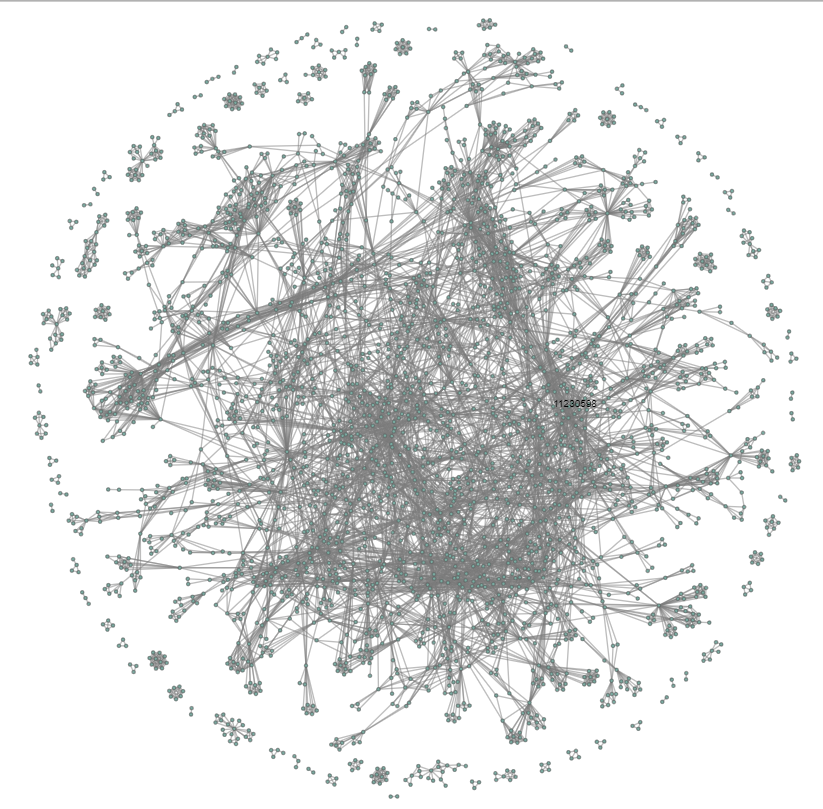

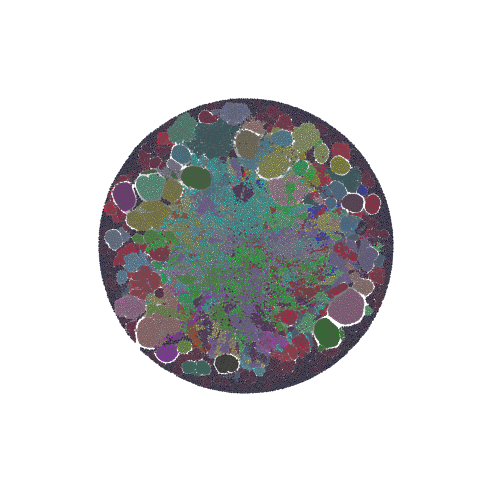

The graph can be seen to showcase what would look like a big circle. The edge of this circle shows alot of communities with only a few links to one another. While the majority of the inside of the network seems to have communities with alot of connections to one another.

In [ ]:
#Save the assignment of authors to communities.
import json
with open('best_partition.json', 'w') as f:
        json.dump(best_partition, f)
with open('communities.json', 'w') as f:
     json.dump(communities, f)

# Part 3

Preparing tokens in each css_paper

In [ ]:
#load data in.
import json, pickle
G = pickle.load(open('week4graph.pickle', 'rb'))
#load json files
with open('best_partition.json', 'r') as f:
    best_partition = json.load(f)
with open('communities.json', 'r') as f:
    communities = json.load(f)

degree_dict = dict(G.degree())
import nltk, pandas as pd, string
css_papers = pd.read_csv(r'C:\Users\khali\OneDrive - Danmarks Tekniske Universitet\6. semester\Computational Social Science\Computational-Social-Science-Exercises\css_df.csv')
#abstract_papers = pd.read_csv(r'C:\Users\khali\OneDrive - Danmarks Tekniske Universitet\6. semester\Computational Social Science\Computational-Social-Science-Exercises\paper_astract_df.csv',lineterminator='\n')
##All abstract rows that have a paperId that is in the css_papers dataframe
#abstract_css_df = abstract_papers[abstract_papers['paperId'].isin(css_papers['paperId'])]
##save abstract_css_df to csv
#abstract_css_df.to_csv(r'C:\Users\khali\OneDrive - Danmarks Tekniske Universitet\6. semester\Computational Social Science\Computational-Social-Science-Exercises\abstract_css_df.csv', index = False)
abstract_css_df = pd.read_csv(r'C:\Users\khali\OneDrive - Danmarks Tekniske Universitet\6. semester\Computational Social Science\Computational-Social-Science-Exercises\abstract_css_df.csv')


In [ ]:
# create tokens & bigrams for each abstract in css_papers
import string
#nltk.download('stopwords')
tok_list = []
bigram_list = []
bad_tokens = set(['nan','https:', 'http:', 'www.']) | set(nltk.corpus.stopwords.words('english')) | set(string.punctuation)
bad_tokens_2 = set(string.punctuation) | set(['[',']','(',')','{','}','<','>','/','\\','|',')',']'])
for i in range(len(abstract_css_df['abstract'])):
    text = abstract_css_df['abstract'].iloc[i]
    if i % 1000 == 0:
       print(i)
    tokens = nltk.word_tokenize(str(text))
    tokens = [token.lower() for token in tokens]
    remove_indexes = []
    for i in range(len(tokens)):
        #remove bad tokens
        if any([(tokens[i] == bad_token) for bad_token in bad_tokens]):
            remove_indexes.append(i)
        elif any([(bad_token in tokens[i]) for bad_token in bad_tokens_2]):
            remove_indexes.append(i)

    for i in range(len(remove_indexes) - 1, -1, -1):
        remove_index = remove_indexes[i]
        del tokens[remove_index]

    if len(tokens) == 1:
        tokens.remove(tokens[0])
    
    #create bigrams using tokens
    bigrams = list(nltk.bigrams(tokens))
    bigram_list.append(bigrams)
    tok_list.append(tokens)

#make new token column in abstract_css_df
abstract_css_df['tokens'] = tok_list
abstract_css_df['bigrams'] = bigram_list
## save abstract_css_df to csv
#abstract_css_df.to_csv(r'C:\Users\khali\OneDrive - Danmarks Tekniske Universitet\6. semester\Computational Social Science\Computational-Social-Science-Exercises\abstract_tok_df.csv', index = False)
#abstract_tok_df = pd.read_csv(r'C:\Users\khali\OneDrive - Danmarks Tekniske Universitet\6. semester\Computational Social Science\Computational-Social-Science-Exercises\abstract_tok_df.csv')

0
1000
2000
3000


# Exercise 4

## task 1
TF-IDF is a measure for how important a token/word is in a corpus and is useful for things like information search, since it can be used as a way to weigh the importance of some words vs others. In TF-IDF, the importance measure of a word is high if the word is unique throughout the corpus, while words that occur commonly throughout the different documents in the corpus are weighted low. For example if searching for a pop song using a snippet of lyrics in a corpus containing pop song lyrics, querying the tokens: ["love", "you" ,"potato"], it intuitively makes sense that "potato" will be very unique in the pop song corpus and songs containing "potato" should be weighted with a high TF-IDF score compared to "love", since one would assume the latter would appear much more frequently. 

Documents (song lyrics) containing the queried terms more frequently should also end up with a higher weighting and this is what the TF stands for - Term Freqency. The (non-normalized) TF for a term in a document can be calculated as simply the term count in the document:
$$ tf (t,d) = f_{t,d}$$
It can be normalized by dividing by total number of words in document, $d$.

IDF - Inverse-document frequency means that tokens that occur frequently across documents in the corpus should be weighted less and the intuition behind it is reasoned using the example above. We use the smooth inverse document frequency in our calculations below:

$$ idf(t,D) = log(\frac{N}{1 + n_t}) + 1$$

where $n_t = |{d \in D: t \in d}|$ is the number of documents $D$ where the term $t$ appears at least once. N is total number of documents in corpus.

TF-IDF is then the product of TF and IDF.


I assume that by "find all of the abstracts of papers written by a member of community c", it is meant all css papers... if not then just change css_papers with abstract_df instead:

In [ ]:
import numpy as np
import threading 
from tqdm import tqdm
# Info about multiprocessing and threading in python: https://medium.com/python-experiments/parallelising-in-python-mutithreading-and-mutiprocessing-with-practical-templates-c81d593c1c49

tok_arrays = {}
thread_lock = threading.Lock()

def extract_community_tokens(communities, c, css_papers, abstract_tok_df):
    explored_papers = {}
    for auths in communities[c]:
        for paper in range(len(css_papers)):        
            if (auths in css_papers['authorIds'].iloc[paper]) and (css_papers['paperId'].iloc[paper] not in explored_papers):
                explored_papers[css_papers['paperId'].iloc[paper]] = abstract_tok_df['tokens'].iloc[paper]
    all_tokens = np.array([])
    for paper in explored_papers:
        all_tokens = np.append(all_tokens, explored_papers[paper])

    with thread_lock:
        tok_arrays[c] = all_tokens

    return all_tokens

thread_list = []
for c in communities:
    t = threading.Thread(target=extract_community_tokens, args=(communities, c, css_papers, abstract_css_df))
    thread_list.append(t)

# start the threads
for thread in thread_list:
    thread.start()

# wait for all threads to complete
for thread in tqdm(thread_list):
    thread.join()

print("All threads completed.")
token_df = pd.DataFrame([tok_arrays]).T
token_df.columns = ['tokens']
token_df.to_csv(r'C:\Users\khali\OneDrive - Danmarks Tekniske Universitet\6. semester\Computational Social Science\Computational-Social-Science-Exercises\token_df_using_css.csv', index = False)


100%|██████████| 127/127 [00:22<00:00,  5.59it/s]

All threads completed.


In [ ]:
#count number of members in each community using np.unique()
indexes, counts = np.unique(list(best_partition.values()), return_counts=True)
token_df['community_size'] = [0]*len(indexes)
for i in indexes:
    token_df['community_size'].loc[str(i)] = counts[i]

TF and IDF in this exercise is understood to be calculated community-wise and not document-wise. First we calculate TF

In [ ]:
#find top 5 communities by number of authors
top_5_communities = token_df.sort_values(by=['community_size'], ascending=False).iloc[:5]

#not clear if for each of 5 or across all 5 communities, across all is given:
#5 most frequent tokens in top 5 communities
fv = None
for i in range(5):
    fdist = nltk.FreqDist(top_5_communities['tokens'].iloc[i])
    if fv == None:
        fv = fdist
    else:
        fv = fv + fdist
fdist = fv
print(fdist.most_common(5))

#Token frequency distribution for each community:
flist = {}
for i in range(len(communities)):
    fdist = nltk.FreqDist(token_df['tokens'].loc[str(i)])
    flist[str(i)] = fdist


[('social', 714), ('data', 665), ('network', 422), ('model', 405), ('information', 399)]


Since we only look at 1-gram TFs we lose the context that the TFs appear in - some words have different meaning in the context they are used, e.g. 'show'. Since we are simply counting the most frequent token, we might also end up with words that are per our definition are not stop words but that in the context of our corpus might as well be, since they almost always occur in scientific papers - like "data" or "show" (which makes much sense, since the foundation of science is arguably data) - another equivalency we can draw, is if we were in a car dealership, describing a specific car using the fact that it has 4 wheels.

When calculating IDF, we use a logbase of 10. If we choose a lower base, e.g. log2, then the weighting with the IDF-term will be much more aggressive - e.g. IDF with $N = 100$ and $n_t = 50$ is $0.30~$ with log10 but with log2 it is $1$


In [ ]:
#idf for each token in corpus.
import math
idf_dict = {}
unique_tokens = np.unique([token for tok_c_list in tok_list for token in tok_c_list])
count = 0
for token in unique_tokens:
    count += 1
    if count % 1000 == 0:
        print(count)
    n_t = 0
    for c in communities:
        if any(token_df['tokens'].loc[str(c)]):
            if token in token_df['tokens'].loc[str(c)]:
                n_t += 1

    idf_dict[token] = int(math.log(len(communities)/n_t,10))


In [ ]:
top_9_communities = token_df.sort_values(by=['community_size'], ascending=False).iloc[:9]
top_9_communities

,tokens,community_size
17,"[ability, objectively, assess, academic, perfo...",166
4,"[linking, social, media, data, survey, data, w...",157
12,"[active, line, research, considered, games, pl...",147
18,"[ability, objectively, assess, academic, perfo...",135
57,"[monitoring, migration, flows, crucial, respon...",122
1,"[venezuela, going, worst, economical, politica...",114
6,"[paper, provides, introduction, proceedings, 2...",106
116,"[convergence, methods, relevant, theories, com...",100
28,"[youtube, ’, growing, importance, news, platfo...",96


In [ ]:
fdist_dict = {}
auth_top_3_dict = {}
for i in range(9):
    fdist = nltk.FreqDist(top_9_communities['tokens'].iloc[i])    
    print(f'Top10 TF:{fdist.most_common(10)}')
    for term in fdist:
        fdist[term] = int(fdist[term]*idf_dict[term])
    print(f'Top10 TF-IDF:{fdist.most_common(10)}')
    fdist_dict[top_9_communities.index[i]] = fdist
    auths = communities[top_9_communities.index[i]]
    auth_index_top_3 = np.argpartition([degree_dict[auth] for auth in auths], -3)[-3:]
    auth_top_3 = [auths[auth] for auth in auth_index_top_3]
    auth_top_3_dict[top_9_communities.index[i]] = auth_top_3
    print(f'Top3 authors by degree:{auth_top_3}, with respective degrees:{[degree_dict[auth] for auth in auth_top_3]}')
    print('\n')

Top10 TF:[('social', 141), ('data', 76), ('show', 74), ('information', 62), ('also', 57), ('agents', 57), ('study', 51), ('results', 50), ('network', 48), ('mechanism', 48)]
Top10 TF-IDF:[('grid', 26), ('electricity', 22), ('smart', 18), ('negotiation', 15), ('storage', 15), ('hare', 14), ('havg', 14), ('bts', 12), ('antagonists', 12), ('crs', 12)]
Top3 authors by degree:['47193909', '145512647', '1705156'], with respective degrees:[40, 49, 88]


Top10 TF:[('news', 224), ('media', 204), ('data', 178), ('social', 153), ('political', 141), ('research', 92), ('online', 83), ('twitter', 76), ('study', 74), ('information', 73)]
Top10 TF-IDF:[('protest', 30), ('personalization', 23), ('recommender', 18), ('cohort', 16), ('astroturfing', 16), ('consent', 14), ('german', 14), ('audiences', 14), ('personalisation', 14), ('microtargeting', 14)]
Top3 authors by degree:['51428797', '51913730', '10721627'], with respective degrees:[30, 36, 48]


Top10 TF:[('social', 209), ('agents', 197), ('informa

The 10 TF-IDF words are more desriptive of the communities because we weight with IDF to promote words that code for more variance in our dataset - words that are common across communities are weighted less.


##  Exercise 5

There are errors somewhere, so some author names are missing. Using wordcloud to visualize TF-IDF, it seems like there are differences between what authors focus on in the different communities. Both in terms of location (e.g. community 4 seems to be based in Germany & Holland, while community 57 is in Italy and Spain) and in areas of interest. 

In community 1, we see that Qatar is mentioned very often, but we note that when looking into the top authors, they are not based in Qatar. This is a limitiation when using 1-gram tokens, since we can't be sure of what context the words appear in. In this case, Qatar is most likely mentioned not because most scientists in the community live there but because of the World Cup in Qatar & Human/worker rights.

If googling Mykola Makhortykh, who we partition to be in community 4, we can see that he is situated at the University of Bern and works in Communication and Media Science and has worked on researching on holocaust, populist radical-right attitues and much more. In this context it makes sense that the wordcloud includes "German" & "war". It is harder to 

Community 17
Alexander C. Rutherford
Marta Bacete Cebrián
[]


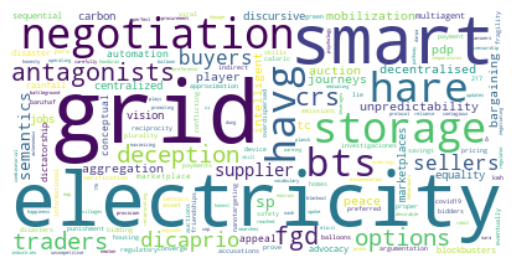



Community 4
Mykola Makhortykh
[]
Damian Trilling


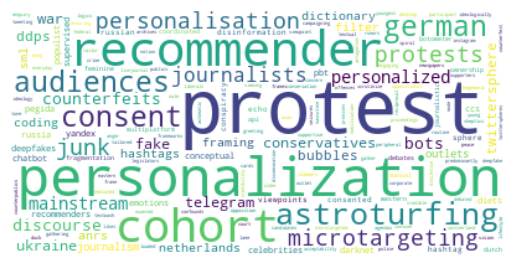



Community 12
Jurij Leskovec
Jon M. Kleinberg
Lada Adamic


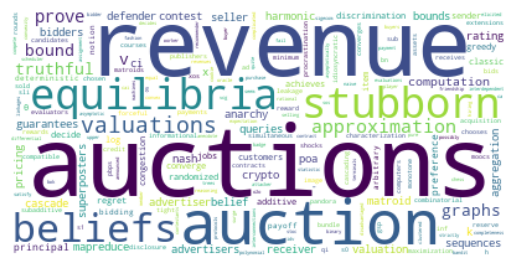



Community 18
Guido Caldarelli
Dirk Helbing
Matjaž Perc


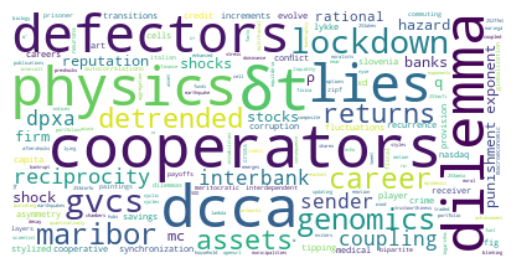



Community 57
Alessandro Vespignani
Nicolas Perra
Michele Tizzoni


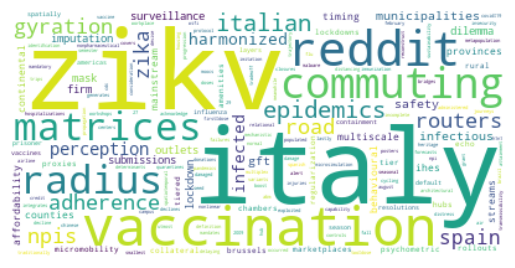



Community 1
[]
Emilio Zagheni
Ingmar Weber


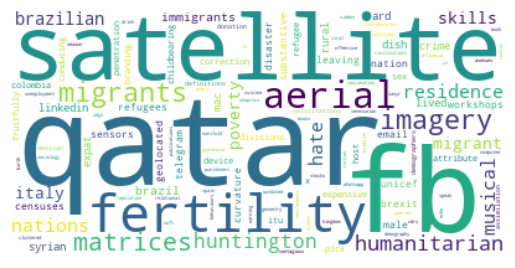



Community 6
John Joseph Horton
Michael S. Bernstein
[]


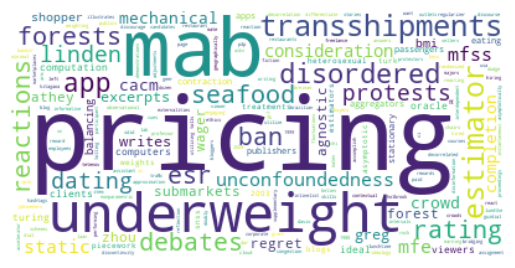



Community 116
[]
Siddharth Suri
Markus Mobius


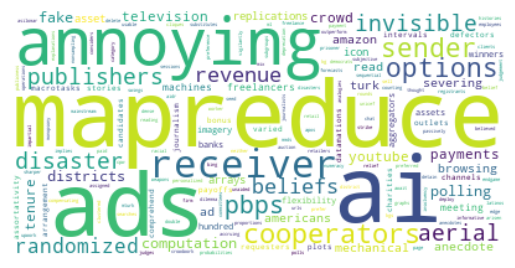



Community 28
nan
Zachary Steinert-threlkeld
[]


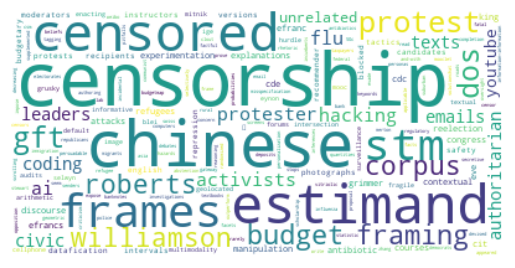

In [ ]:
for i in top_9_communities.index:

    print(f'Community {i}')
    auth_top_3 = auth_top_3_dict[i]
    #print(f'Top 3 authors by degree: {auth_top_3}')
    for auth in auth_top_3:
        auth_name = G.nodes[auth]["name"]
        print(auth_name)
    wd = wordcloud.WordCloud(background_color="white").generate_from_frequencies(fdist_dict[i])
    plt.imshow(wd, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print('\n')
